# Preprocessing for the BBBC022 hand annotated set

- Create binary boundary images from annotations (different boundary sizes)
- Copy original images and annotations to the data directories, one directory for each boundary size


- Create three class labels from annotations for comparison with previous experiments
- Copy original images and three class labels to the data directory


- Give a preview of how the data should be processed in the generator preparing it for training

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import skimage.io

import os

In [2]:
debug = True

In [3]:
dir_raw_images = '/home/jr0th/github/segmentation/data/BBBC022_hand_200/raw_images/'
dir_raw_annotations = '/home/jr0th/github/segmentation/data/BBBC022_hand_200/raw_annotations/'

In [4]:
filelist = sorted(os.listdir(dir_raw_images))

# run over all raw images
for filename in filelist:
    
    # ANNOTATION
    annot = skimage.io.imread(dir_raw_annotations + filename)
    
    # strip the first channel
    annot = annot[:,:,0]
    
    if(debug):
        print(annot.dtype, annot.shape)
    
    # TODO find boundaries and save
    
    # IMAGES
    # TODO copy to the right directory

uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 696)
uint8 (520, 69

## Preview for ImageDataGenerator

BEFORE
uint16 (520, 696)


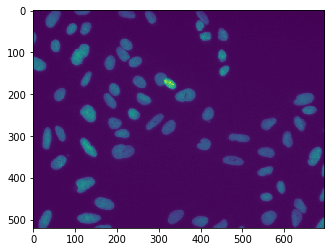

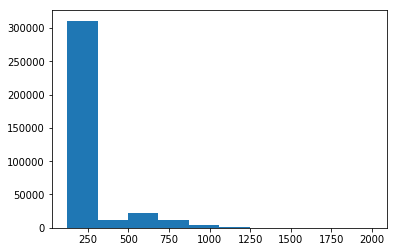

AFTER
float16 (520, 696)


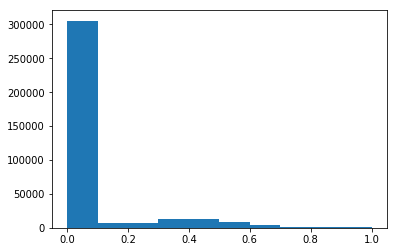

In [5]:
# get one image
filename = filelist[0]
    
# load image and its annotation
img = skimage.io.imread(dir_raw_images + filename)

if(debug):
    print("BEFORE")
    print(img.dtype, img.shape)
    plt.imshow(img)
    plt.show()
    plt.hist(img.flatten())
    plt.show()        

# IMAGE

# normalize to [0,1]
percentile = 99.9
high = np.percentile(img, percentile)
low = np.percentile(img, 100-percentile)

img = np.minimum(high, img)
img = np.maximum(low, img)

img = (img - low) / (high - low)

# cast to float16 (from float64 which seems to be the numpy default)
img = img.astype(np.float16) 


if(debug):
    print("AFTER")
    print(img.dtype, img.shape)
    plt.hist(img.flatten())
    plt.show()